In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow as tf
from IMNN import IMNN
from IMNN.ABC import ABC, priors
import pandas

In [2]:
print("TensorFlow version =", tf.__version__)
print("IMNN version =", IMNN.__version__)

TensorFlow version = 2.0.0
IMNN version = 0.2a4


In [76]:
#LOAD OUR DATA
d = np.load('DES_GalGal_ACTIVE/CONFIGURATION_1_images.npy') #fiducial
d = d.transpose([0, 2, 3, 1])
dlog = pandas.read_csv('DES_GalGal_ACTIVE/CONFIGURATION_1_metadata.csv')
d1 = np.load('DES_GalGal_ACTIVE/CONFIGURATION_2_images.npy') #above
d1 = d1.transpose([0, 2, 3, 1])
d1log = pandas.read_csv('DES_GalGal_ACTIVE/CONFIGURATION_2_metadata.csv')
d2 = np.load('DES_GalGal_ACTIVE/CONFIGURATION_3_images.npy') #bellow
d2 = d2.transpose([0, 2, 3, 1])
d2log = pandas.read_csv('DES_GalGal_ACTIVE/CONFIGURATION_3_metadata.csv')

In [77]:
dtrain = d[:500]
dtest = d[500:]
print(np.shape(dtrain))

(500, 100, 100, 5)


In [78]:
#option with additional n_param dimension
temp = [[]]*1000
temp1 = [[]]*1000
temp2 = [[]]*1000

for i in range(len(d)):
    temp[i] = [d[i]]
d_shape = np.stack(temp)
print(np.shape(d_shape))

for i in range(len(d1)):
    temp1[i] = [d1[i]]
d1_shape = np.stack(temp)
print(np.shape(d1_shape))

for i in range(len(d2)):
    temp2[i] = [d2[i]]
d2_shape = np.stack(temp)
print(np.shape(d2_shape))

#produce tensor with simulations with theta above and bellow fiducial
dd_dθ_num = np.concatenate([d2_shape[:, np.newaxis, ...], d1_shape[:, np.newaxis, ...]], axis=1)
np.shape(dd_dθ_num)

dd_dθ_num_train = dd_dθ_num[:500]
dd_dθ_num_test = dd_dθ_num[500:]
print(np.shape(dd_dθ_num_test))

(1000, 1, 100, 100, 5)
(1000, 1, 100, 100, 5)
(1000, 1, 100, 100, 5)
(500, 2, 1, 100, 100, 5)


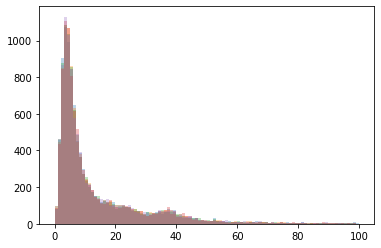

In [79]:
plt.hist(dtrain[0,:,:,0].flatten(), bins = 100,alpha = 0.3, range=[0,100])
plt.hist(dtrain[0,:,:,1].flatten(), bins = 100,alpha = 0.3, range=[0,100])
plt.hist(dtrain[0,:,:,2].flatten(), bins = 100, alpha = 0.3, range=[0,100])
plt.hist(dtrain[0,:,:,3].flatten(), bins = 100, alpha = 0.3, range=[0,100])
plt.hist(dtrain[0,:,:,4].flatten(), bins = 100, alpha = 0.3, range=[0,100])
plt.show()

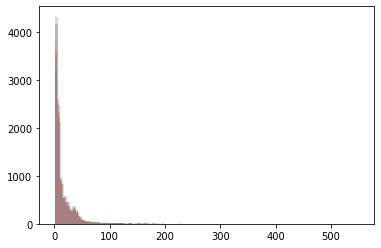

Means for 5 filters are: 17.83199106153102 17.85929577651231 17.865154227221932 17.875073979140435 17.861848493593037
Stds for 5 filters are: 33.55922508470346 34.739263897356444 35.57137059960916 34.26838354140535 35.759891906528026


In [80]:
plt.hist(dtrain[0,:,:,0].flatten(), bins = 100,alpha = 0.3)
plt.hist(dtrain[0,:,:,1].flatten(), bins = 100,alpha = 0.3)
plt.hist(dtrain[0,:,:,2].flatten(), bins = 100, alpha = 0.3)
plt.hist(dtrain[0,:,:,3].flatten(), bins = 100, alpha = 0.3)
plt.hist(dtrain[0,:,:,4].flatten(), bins = 100, alpha = 0.3)
plt.show()
print("Means for 5 filters are:",d[0,:,:,0].mean(),d[0,:,:,1].mean(),d[0,:,:,2].mean(),d[0,:,:,3].mean(),d[0,:,:,4].mean())
print("Stds for 5 filters are:",d[0,:,:,0].std(),d[0,:,:,1].std(),d[0,:,:,2].std(),d[0,:,:,3].std(),d[0,:,:,4].std())

# STANDARDIZED DATASET

In [81]:
#Standardize images
d_std = []
tmp = np.zeros((1000,100,100,5))
for i in range(0,1000):
    for j in range(0,5):
        tmp[i,:,:,j] = (d[i,:,:,j] - d[i,:,:,j].mean()) / d[i,:,:,j].std()
d_std.append(tmp)
d_standardized = d_std[0]


d_std_1 = []
tmp = np.zeros((1000,100,100,5))
for i in range(0,1000):
    for j in range(0,5):
        tmp[i,:,:,j] = (d1[i,:,:,j] - d1[i,:,:,j].mean()) / d1[i,:,:,j].std()
d_std_1.append(tmp)
d_standardized_1 = d_std_1[0]


d_std_2 = []
tmp = np.zeros((1000,100,100,5))
for i in range(0,1000):
    for j in range(0,5):
        tmp[i,:,:,j] = (d2[i,:,:,j] - d2[i,:,:,j].mean()) / d2[i,:,:,j].std()
d_std_2.append(tmp)
d_standardized_2 = d_std_2[0]

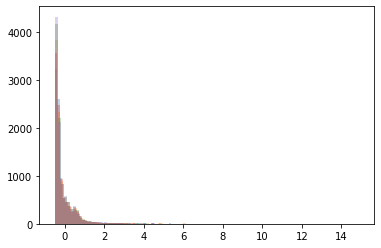

In [82]:
plt.hist(d_standardized[0,:,:,0].flatten(), bins = 100,alpha = 0.3)
plt.hist(d_standardized[0,:,:,1].flatten(), bins = 100,alpha = 0.3)
plt.hist(d_standardized[0,:,:,2].flatten(), bins = 100, alpha = 0.3)
plt.hist(d_standardized[0,:,:,3].flatten(), bins = 100, alpha = 0.3)
plt.hist(d_standardized[0,:,:,4].flatten(), bins = 100, alpha = 0.3)
plt.show()

In [83]:
dtrain_s = d_standardized[:500]
dtest_s = d_standardized[500:]
print(np.shape(dtrain_s))

(500, 100, 100, 5)


In [84]:
#Standardized derivative datasets
#option with additional n_param dimension
temp = [[]]*1000
temp1 = [[]]*1000
temp2 = [[]]*1000

for i in range(len(d)):
    temp[i] = [d_standardized[i]]
d_shape_s = np.stack(temp)
print(np.shape(d_shape_s))

for i in range(len(d1)):
    temp1[i] = [d_standardized_1[i]]
d1_shape_s = np.stack(temp)
print(np.shape(d1_shape_s))

for i in range(len(d2)):
    temp2[i] = [d_standardized_2[i]]
d2_shape_s = np.stack(temp)
print(np.shape(d2_shape_s))

#produce tensor with simulations with theta above and bellow fiducial
dd_dθ_num_std = np.concatenate([d2_shape_s[:, np.newaxis, ...], d1_shape_s[:, np.newaxis, ...]], axis=1)
np.shape(dd_dθ_num_std)

dd_dθ_num_train_s = dd_dθ_num_std[:500]
dd_dθ_num_test_s = dd_dθ_num_std[500:]
print(np.shape(dd_dθ_num_test_s))

(1000, 1, 100, 100, 5)
(1000, 1, 100, 100, 5)
(1000, 1, 100, 100, 5)
(500, 2, 1, 100, 100, 5)


# Normalized dataset

In [85]:
#Normalize images
d_norm = []
tmp = np.zeros((1000,100,100,5))
for i in range(0,1000):
    for j in range(0,5):
        tmp[i,:,:,j] = (d[i,:,:,j] - d[i,:,:,j].min()) / (d[i,:,:,j].max() - d[i,:,:,j].min())
d_norm.append(tmp)
d_normalized = d_norm[0]


d_norm_1 = []
tmp = np.zeros((1000,100,100,5))
for i in range(0,1000):
    for j in range(0,5):
        tmp[i,:,:,j] = (d1[i,:,:,j] - d1[i,:,:,j].min()) / (d1[i,:,:,j].max() - d1[i,:,:,j].min())
d_norm_1.append(tmp)
d_normalized_1 = d_norm_1[0]


d_norm_2 = []
tmp = np.zeros((1000,100,100,5))
for i in range(0,1000):
    for j in range(0,5):
        tmp[i,:,:,j] = (d2[i,:,:,j] - d2[i,:,:,j].min()) / (d2[i,:,:,j].max() - d2[i,:,:,j].min())
d_norm_2.append(tmp)
d_normalized_2 = d_norm_2[0]

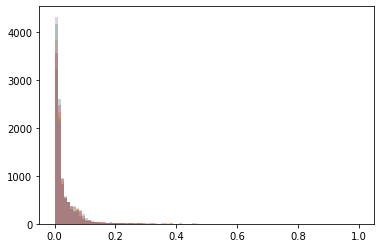

In [86]:
plt.hist(d_normalized[0,:,:,0].flatten(), bins = 100,alpha = 0.3)
plt.hist(d_normalized[0,:,:,1].flatten(), bins = 100,alpha = 0.3)
plt.hist(d_normalized[0,:,:,2].flatten(), bins = 100, alpha = 0.3)
plt.hist(d_normalized[0,:,:,3].flatten(), bins = 100, alpha = 0.3)
plt.hist(d_normalized[0,:,:,4].flatten(), bins = 100, alpha = 0.3)
plt.show()

In [87]:
dtrain_n = d_normalized[:500]
dtest_n = d_normalized[500:]
print(np.shape(dtrain_n))

(500, 100, 100, 5)


In [88]:
#Normalized derivative datasets
#option with additional n_param dimension
temp = [[]]*1000
temp1 = [[]]*1000
temp2 = [[]]*1000

for i in range(len(d)):
    temp[i] = [d_normalized[i]]
d_shape_n = np.stack(temp)
print(np.shape(d_shape_n))

for i in range(len(d1)):
    temp1[i] = [d_normalized_1[i]]
d1_shape_n = np.stack(temp)
print(np.shape(d1_shape_n))

for i in range(len(d2)):
    temp2[i] = [d_normalized_2[i]]
d2_shape_n = np.stack(temp)
print(np.shape(d2_shape_n))

#produce tensor with simulations with theta above and bellow fiducial
dd_dθ_num_norm = np.concatenate([d2_shape_n[:, np.newaxis, ...], d1_shape_n[:, np.newaxis, ...]], axis=1)
np.shape(dd_dθ_num_norm)

dd_dθ_num_train_n = dd_dθ_num_norm[:500]
dd_dθ_num_test_n = dd_dθ_num_norm[500:]
print(np.shape(dd_dθ_num_test_n))

(1000, 1, 100, 100, 5)
(1000, 1, 100, 100, 5)
(1000, 1, 100, 100, 5)
(500, 2, 1, 100, 100, 5)


# Chechking mean and variance for all images in all filters 

In [118]:
#find variance of meand and std 
d_std_mean = []
tmp = np.zeros((1000,2,5))
for i in range(0,1000):
    for j in range(0,5):
        tmp[i,0,j] = d[i,:,:,j].mean()
        tmp[i,1,j] = d[i,:,:,j].std()
d_std_mean.append(tmp)
d_st_m = d_std_mean[0]
np.shape(d_st_m)

(1000, 2, 5)

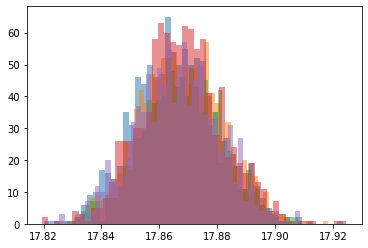

In [133]:
#mean
plt.hist(d_st_m[:,0,0], bins = 50, alpha = 0.5)
plt.hist(d_st_m[:,0,1], bins = 50, alpha = 0.5)
plt.hist(d_st_m[:,0,2], bins = 50, alpha = 0.5)
plt.hist(d_st_m[:,0,3], bins = 50, alpha = 0.5)
plt.hist(d_st_m[:,0,4], bins = 50, alpha = 0.5)
plt.show()

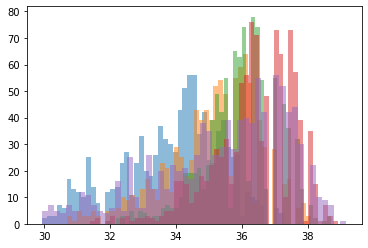

In [131]:
#std
plt.hist(d_st_m[:,1,0], bins = 50, alpha = 0.5)
plt.hist(d_st_m[:,1,1], bins = 50, alpha = 0.5)
plt.hist(d_st_m[:,1,2], bins = 50, alpha = 0.5)
plt.hist(d_st_m[:,1,3], bins = 50, alpha = 0.5)
plt.hist(d_st_m[:,1,4], bins = 50, alpha = 0.5)
plt.show()

# One filter dataset

In [98]:
dtrain1 = dtrain[:,:,:,0]
dtest1 = dtest[:,:,:,0]
dd_dθ_num_train1 = dd_dθ_num_train[:,:,:,:,:,0]
dd_dθ_num_test1 = dd_dθ_num_test[:,:,:,:,:,0]

dtrain_1n = dtrain_n[:,:,:,0]
dtest_1n = dtest_n[:,:,:,0]
dd_dθ_num_train_1n = dd_dθ_num_train_n[:,:,:,:,:,0]
dd_dθ_num_test_1n = dd_dθ_num_test_n[:,:,:,:,:,0]

dtrain_1s = dtrain_s[:,:,:,0]
dtest_1s = dtest_s[:,:,:,0]
dd_dθ_num_train_1s = dd_dθ_num_train_s[:,:,:,:,:,0]
dd_dθ_num_test_1s = dd_dθ_num_test_s[:,:,:,:,:,0]

In [99]:
#Reshape to be able to use in Conv2D layer
dtrain1 = np.array([dtrain1])
dtrain1 = dtrain1.transpose([1,2,3,0])
dtest1 = np.array([dtest1])
dtest1 = dtest1.transpose([1,2,3,0])

dd_dθ_num_train1 = np.array([dd_dθ_num_train1])
dd_dθ_num_train1 = dd_dθ_num_train1.transpose([1,2,3,4,5,0])
dd_dθ_num_test1 = np.array([dd_dθ_num_test1])
dd_dθ_num_test1 = dd_dθ_num_test1.transpose([1,2,3,4,5,0])


dtrain_1n = np.array([dtrain_1n])
dtrain_1n = dtrain_1n.transpose([1,2,3,0])
dtest_1n = np.array([dtest_1n])
dtest_1n = dtest_1n.transpose([1,2,3,0])

dd_dθ_num_train_1n = np.array([dd_dθ_num_train_1n])
dd_dθ_num_train_1n = dd_dθ_num_train_1n.transpose([1,2,3,4,5,0])
dd_dθ_num_test_1n = np.array([dd_dθ_num_test_1n])
dd_dθ_num_test_1n = dd_dθ_num_test_1n.transpose([1,2,3,4,5,0])


dtrain_1s = np.array([dtrain_1s])
dtrain_1s = dtrain_1s.transpose([1,2,3,0])
dtest_1s = np.array([dtest_1s])
dtest_1s = dtest_1s.transpose([1,2,3,0])

dd_dθ_num_train_1s = np.array([dd_dθ_num_train_1s])
dd_dθ_num_train_1s = dd_dθ_num_train_1s.transpose([1,2,3,4,5,0])
dd_dθ_num_test_1s = np.array([dd_dθ_num_test_1s])
dd_dθ_num_test_1s = dd_dθ_num_test_1s.transpose([1,2,3,4,5,0])

In [102]:
print(np.shape(dtrain_1s))
print(np.shape(dd_dθ_num_train_1s))

(500, 100, 100, 1)
(500, 2, 1, 100, 100, 1)


# IMNN

In [15]:
#input_shape = (100,100,5)
input_shape = (100,100,1)
n_params = 1
n_summaries = 1
n_s = 500
n_d = 500
#fiducial = np.array([5.0])
#delta = np.array([0.1])
fiducial = np.array([20.])
delta = np.array([1.])

In [16]:
class fiducial_generator:
    def __init__(self, file):
        self.file = file
    def __call__(self, i):
        data = np.load(self.file)
        yield data[i], i
        
class derivative_generator:
    def __init__(self, file):
        self.file = file
    def __call__(self, i, j, k):
        data = np.load(self.file)
        yield data[i, j, k], (i, j, k)

In [17]:
print("n_params =", n_params)
print("n_summaries =", n_summaries)
print("n_s =", n_s)
print("n_d =", n_d)
print("input_shape =", input_shape)
print("θ_fid =", fiducial)
print("δθ =", delta)

n_params = 1
n_summaries = 1
n_s = 500
n_d = 500
input_shape = (100, 100, 1)
θ_fid = [20.]
δθ = [1.]


In [18]:
class LeakyReLU(tf.keras.layers.Layer):
    def __init__(self, α, **kwargs):
        self.α = α
        super(LeakyReLU, self).__init__(**kwargs)
    def build(self, input_shape):
        super(LeakyReLU, self).build(input_shape)
    def call(self, x):
        return tf.where(tf.greater(x, 0) , x=x, y=tf.multiply(self.α, x))
    def compute_output_shape(self, input_shape):
        return input_shape

In [56]:
#MY MODEL THAT WILL WORK WITH IMAGES FROM LENSING SIMULATOR
model = tf.keras.Sequential(
    [tf.keras.Input(shape=input_shape),
#     tf.keras.layers.Conv2D(8, (5, 5), strides=2, padding="same"),#, kernel_regularizer=tf.keras.regularizers.l2(100)),
#     LeakyReLU(0.01),
#     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Conv2D(16, (3, 3), strides=2, padding="same"),#, kernel_regularizer=tf.keras.regularizers.l2(100)),
     LeakyReLU(0.01),
#     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Conv2D(32, (3, 3), strides=2, padding="same"),#, kernel_regularizer=tf.keras.regularizers.l2(100)),
     LeakyReLU(0.01),
#     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128),#,kernel_regularizer=tf.keras.regularizers.l2(100)),
#     LeakyReLU(0.01),
     tf.keras.layers.Dense(32),#,kernel_regularizer=tf.keras.regularizers.l2(100)),
     LeakyReLU(0.01),
     tf.keras.layers.Dense(n_summaries),
    ])
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 50, 50, 16)        160       
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 25, 25, 32)        4640      
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 25, 25, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 20000)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                640032    
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 32)               

In [57]:
imnn = IMNN.IMNN(n_s=n_s, n_d=n_d, n_params=n_params, n_summaries=n_summaries, input_shape=input_shape,
                 model=model, optimiser=opt, θ_fid=fiducial, δθ=delta, 
                 fiducial_loader=dtrain_1n, 
                 derivative_loader=dd_dθ_num_train_1n,
                 validation_fiducial_loader=dtest_1n, 
                 validation_derivative_loader=dd_dθ_num_test_1n,
                 at_once=500,
                 map_fn=None, check_shape=True,
                 verbose=True, filename="model", save=True)

input shape will be (100, 100, 1)
saving model to model
INFO:tensorflow:Assets written to: model/assets


In [58]:
imnn.fit(None, λ=10., ϵ=0.01, patience=10, min_iterations=1000)

Using patience length of 10. Maximum number of training iterations is 10000000000.
Saving current model in model
INFO:tensorflow:Assets written to: model/assets


InvalidArgumentError:  Input is not invertible.
	 [[node MatrixInverse (defined at /opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py:1751) ]] [Op:__inference_fast_train_18294]

Function call stack:
fast_train


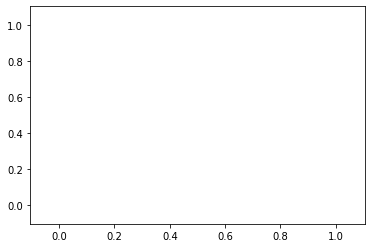

In [41]:
plt.plot(imnn.history["det_F"])
plt.plot(imnn.history["val_det_F"])

# One filter circles

In [4]:
#LOAD OUR DATA
d = np.load('DES_GalGal_ACTIVE/circles.npy') #fiducial
d1 = np.load('DES_GalGal_ACTIVE/circles_up.npy') #above
d2 = np.load('DES_GalGal_ACTIVE/circles_down.npy') #bellow

In [6]:
#find variance of meand and std 
d_std_mean = []
tmp = np.zeros((1000,2))
for i in range(0,1000):
        tmp[i,0] = d[i,:,:,:].mean()
        tmp[i,1] = d[i,:,:,:].std()
d_std_mean.append(tmp)
d_st_m = d_std_mean[0]
np.shape(d_st_m)

(1000, 2)

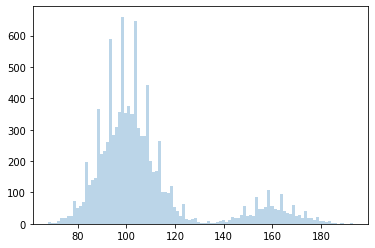

In [48]:
plt.hist(d[0,:,:,0].flatten(), bins = 100,alpha = 0.3)
plt.show()

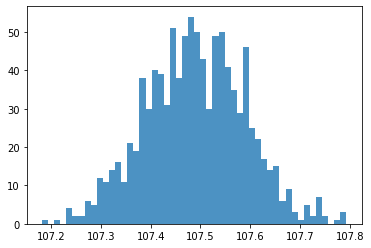

In [32]:
#mean
plt.hist(d_st_m[:,0], bins = 50, alpha = 0.8)
plt.show()

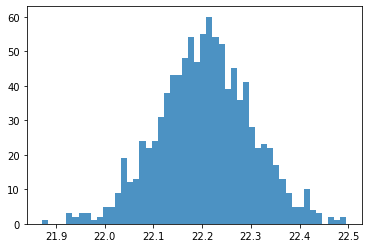

In [33]:
#std
plt.hist(d_st_m[:,1], bins = 50, alpha = 0.8)
plt.show()

In [34]:
#Normalize images
d_norm = []
tmp = np.zeros((1000,100,100,1))
for i in range(0,1000):
    for j in range(0,1):
        tmp[i,:,:,j] = (d[i,:,:,j] - d[i,:,:,j].min()) / (d[i,:,:,j].max() - d[i,:,:,j].min())
d_norm.append(tmp)
d_normalized = d_norm[0]


d_norm_1 = []
tmp = np.zeros((1000,100,100,1))
for i in range(0,1000):
    for j in range(0,1):
        tmp[i,:,:,j] = (d1[i,:,:,j] - d1[i,:,:,j].min()) / (d1[i,:,:,j].max() - d1[i,:,:,j].min())
d_norm_1.append(tmp)
d_normalized_1 = d_norm_1[0]


d_norm_2 = []
tmp = np.zeros((1000,100,100,1))
for i in range(0,1000):
    for j in range(0,1):
        tmp[i,:,:,j] = (d2[i,:,:,j] - d2[i,:,:,j].min()) / (d2[i,:,:,j].max() - d2[i,:,:,j].min())
d_norm_2.append(tmp)
d_normalized_2 = d_norm_2[0]

In [37]:
dtrain_1n = d_normalized[:500]
dtest_1n = d_normalized[500:]
print(np.shape(dtrain_1n))

(500, 100, 100, 1)


In [53]:
#option with additional n_param dimension
temp = [[]]*1000
temp1 = [[]]*1000
temp2 = [[]]*1000

for i in range(len(d_normalized)):
    temp[i] = [d_normalized[i]]
d_shape = np.stack(temp)
print(np.shape(d_shape))

for i in range(len(d_normalized_1)):
    temp1[i] = [d_normalized_1[i]]
d1_shape = np.stack(temp)
print(np.shape(d1_shape))

for i in range(len(d_normalized_2)):
    temp2[i] = [d_normalized_2[i]]
d2_shape = np.stack(temp)
print(np.shape(d2_shape))

#produce tensor with simulations with theta above and bellow fiducial
dd_dθ_num = np.concatenate([d2_shape[:, np.newaxis, ...], d1_shape[:, np.newaxis, ...]], axis=1)
np.shape(dd_dθ_num)

dd_dθ_num_train_1n = dd_dθ_num[:500]
dd_dθ_num_test_1n = dd_dθ_num[500:]
print(np.shape(dd_dθ_num_test))

(1000, 1, 100, 100, 1)
(1000, 1, 100, 100, 1)
(1000, 1, 100, 100, 1)
(500, 2, 1, 100, 100, 1)


In [39]:
#find variance of meand and std 
d_std_mean = []
tmp = np.zeros((1000,2))
for i in range(0,1000):
        tmp[i,0] = d_normalized[i,:,:,:].mean()
        tmp[i,1] = d_normalized[i,:,:,:].std()
d_std_mean.append(tmp)
d_st_m = d_std_mean[0]
np.shape(d_st_m)

(1000, 2)

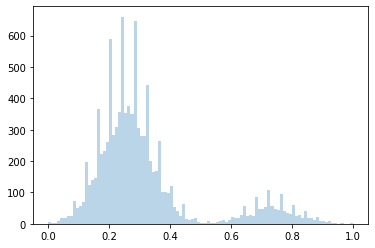

In [47]:
plt.hist(d_normalized[0,:,:,0].flatten(), bins = 100,alpha = 0.3)
plt.show()

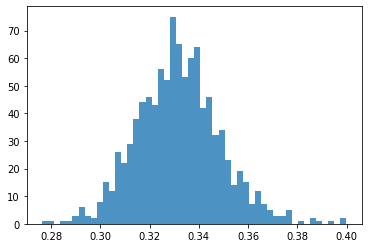

In [40]:
#mean
plt.hist(d_st_m[:,0], bins = 50, alpha = 0.8)
plt.show()

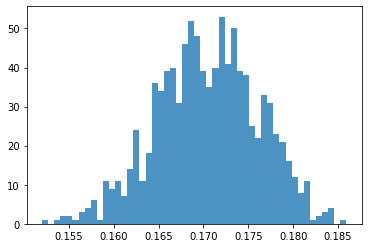

In [41]:
#std
plt.hist(d_st_m[:,1], bins = 50, alpha = 0.8)
plt.show()